In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

2025-11-20 11:40:01.993554: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 11:40:02.008145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-20 11:40:02.130909: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-20 11:40:02.229586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763649602.311614    5583 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763649602.33

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


Printeamos los primeros 25 numeros o imagenes

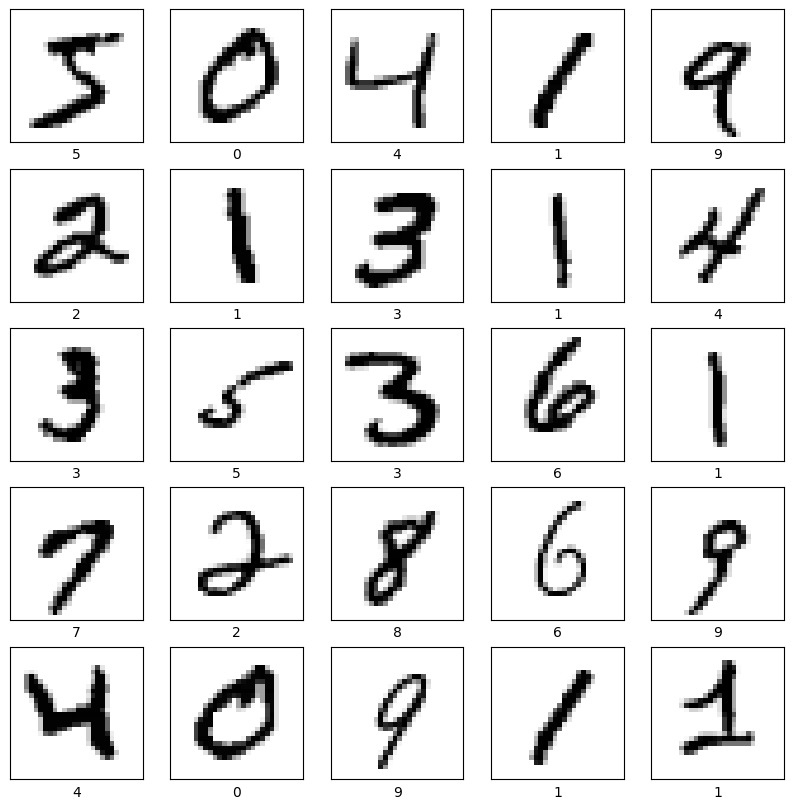

In [3]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
# explore the data
print(f"Existen {len(X_train)} imagenes en el set de entrenamiento y {len(X_test)} imagenes para testeo")
print(f"El tamano de cada imagen es de {X_train[0].shape}.")

Existen 60000 imagenes en el set de entrenamiento y 10000 imagenes para testeo
El tamano de cada imagen es de (28, 28).


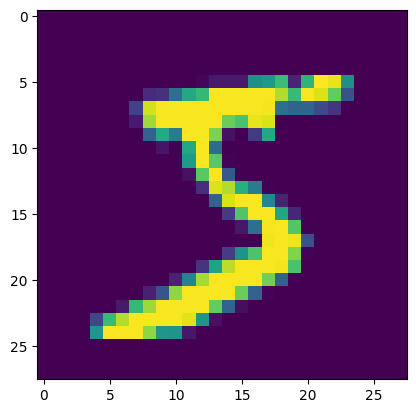

In [5]:
plt.imshow(X_train[0])


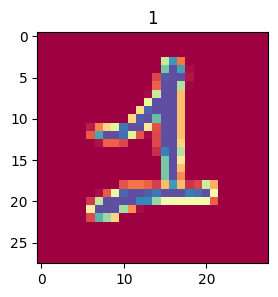

In [6]:
plt.figure(figsize=(3, 3))
plt.imshow(X_train[24], cmap="Spectral") #Printeo el numero que quiera con los colores del cmap
plt.title(y_train[24]);

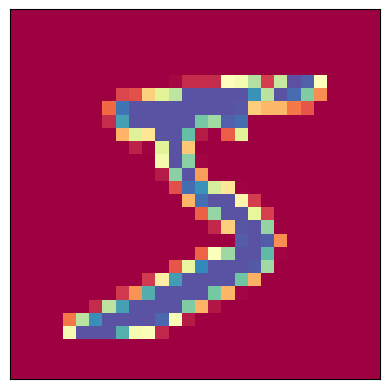

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [7]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="Spectral")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

## Reshape a los datos

In [8]:
# reshape the data as we do not have 3rd value of an image
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))

X_train.shape,  X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Hacemos un reshape a los datos con un $+(1,)$ dado que Conv2D requiere entrada 4D: (batch, height, width, channels). Para imágenes en escala de grises se usa 1, para RGB 3.

Neural networks tend to like normalized data and perform better on it. Normalization, in simple terms, means to have the data at the same scale, that is, in our case, between 0 and 1. Let’s normalize our train and test images.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

# also need to change the data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Build the model

In [10]:
# Create an input layer
input_layer = layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with 1 color channel (grayscale)

# Build the CNN model
model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

2025-11-20 11:40:08.519236: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

## Misma red pero conn Functional API

In [12]:
# ...existing code...
#from tensorflow.keras import Input, Model
#
#inputs = Input(shape=(28, 28, 1))  # input layer
#x = layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu')(inputs)
#x = layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu')(x)
#x = layers.MaxPooling2D()(x)
#
#x = layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu')(x)
#x = layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu')(x)
#x = layers.MaxPooling2D()(x)
#
#x = layers.Flatten()(x)
#outputs = layers.Dense(10, activation='softmax')(x)
#
#model = Model(inputs=inputs, outputs=outputs, name='cnn_functional')
#
#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
#
#model.summary()
## ...existing code...

## Observaciones de la red:
- Crea 10 mapas de característica (10 filtros). Cada filtro es una matriz 3×3 de pesos (por cada canal de entrada)
- Filtros (filters): número de mapas de salida / canales de salida. Cada filtro aprende a extraer una característica distinta (bordes, texturas, etc.). Resultado: depth = filters.
- Kernel (kernel_size=(3,3)): tamaño de la ventana deslizante (receptive field). Es un conjunto de pesos aprendibles de tamaño 3×3 (por cada canal de entrada) que se aplica convolucionalmente.
- Fórmula salida (padding='valid', stride=1): Out = In - Kernel + 1.
    - Primera conv: 28 - 3 + 1 = 26 → (None, 26, 26, 10).
    - Segunda conv: 26 - 3 + 1 = 24 → (None, 24, 24, 10).

In [15]:
#Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [16]:
# Define callbacks function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.98:
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True
            
back = myCallback() 

### Observaciones Callbacks
- Basta con crear una clase y llamar a keras.callbacks
- Sirve para evitar overfitting si sabemos que despues de cierto porcentaje no hay cambios

In [17]:
# train the model
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2,callbacks=[back])

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7279 - loss: 0.8296 - val_accuracy: 0.9582 - val_loss: 0.1429
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9571 - loss: 0.1367 - val_accuracy: 0.9749 - val_loss: 0.0903
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9699 - loss: 0.0997 - val_accuracy: 0.9739 - val_loss: 0.0860
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9763 - loss: 0.0792 - val_accuracy: 0.9772 - val_loss: 0.0764
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9793 - loss: 0.0701 - val_accuracy: 0.9795 - val_loss: 0.0641
Epoch 6/100
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9832 - loss: 0.0574
Reached 98% accuracy so cancelling training!
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9832 - loss: 0.0574 - val_accuracy: 0.9833 - val_loss: 0.0595


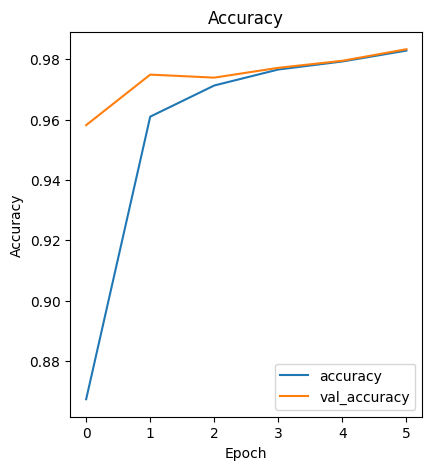

In [18]:
# plot the accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

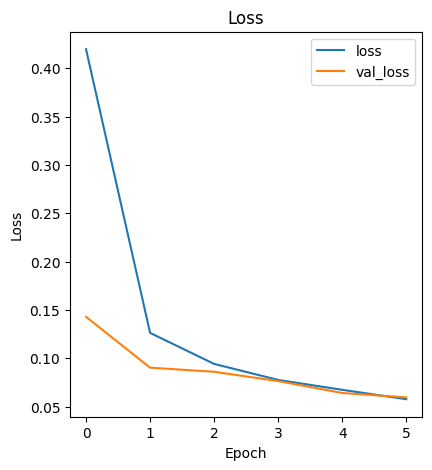

In [19]:
# model loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9817 - loss: 0.0566
Test Loss: 0.04598941281437874
Test Accuracy: 0.9850999712944031


In [22]:
# lets save the model
model.save('models/digit-recognizer.h5')

## Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [23]:
# Grab an image from the test dataset.
img = X_test[5]

print(img.shape)

(28, 28, 1)


In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [25]:
pred_digit = model.predict(img)
pred_digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[1.3555058e-07, 9.9988365e-01, 4.0337306e-07, 8.0889976e-07,
        7.1836374e-05, 2.5393518e-09, 4.8809079e-07, 3.2597716e-05,
        3.2407593e-06, 6.8613554e-06]], dtype=float32)